
**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np


# Load the data into a pandas DataFrame
file_path = '/Users/andriannakis/Downloads/medical-charges.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1', on_bad_lines='skip')

import os
file_path = '/Users/andriannakis/Downloads/medical-charges.csv'
print("File exists:", os.path.exists(file_path))

# Display the first 5 records
df.head()

# Ideas for predicting charges without ML:


# 1. Correlation Analysis
#    - Calculate the correlation between 'charges' and other columns (age, bmi, smoker, etc.).
#    - Identify columns with strong positive or negative correlation with 'charges'.
#    - Create a simple linear regression model based on the most correlated variables.

df_encoded = df.copy()
df_encoded['sex'] = df_encoded['sex'].map({'male': 1, 'female': 0})
df_encoded['smoker'] = df_encoded['smoker'].map({'yes': 1, 'no': 0})
df_encoded['region'] = df_encoded['region'].astype('category').cat.codes

correlation_matrix = df_encoded.corr()
charges_correlation = correlation_matrix['charges']
print("Correlation with 'charges':")
print(charges_correlation)

# Linear regression on most correlated variables (age, bmi, smoker)
X = df_encoded[['age', 'bmi', 'smoker']]
y = df_encoded['charges']
linear_model = LinearRegression().fit(X, y)
print("Linear Regression coefficients:", linear_model.coef_)

# 2. Grouping and Aggregation
#    - Group the data by categorical variables like 'smoker', 'sex', or 'region'.
#    - Calculate the average 'charges' for each group.
#    - Create a lookup table to predict charges based on the categorical group a new record belongs to.

grouped_data = df.groupby(['smoker', 'sex', 'region'])['charges'].mean().reset_index()
print("\nGrouped Data - Average Charges by Smoker, Sex, and Region:")
print(grouped_data)

# 3. Rule-based Approach
#    - Analyze the data to identify specific rules or patterns that relate to higher or lower charges.
#    - For example, smokers might have significantly higher charges on average.
#    - Develop a set of rules based on the identified patterns to predict charges.

def rule_based_prediction(row):
    if row['smoker'] == 'yes' and row['bmi'] > 30:
        return 'High charges'
    elif row['smoker'] == 'yes':
        return 'Moderate to high charges'
    elif row['age'] > 50 and row['bmi'] > 25:
        return 'Moderate charges'
    else:
        return 'Lower charges'

df['rule_based_prediction'] = df.apply(rule_based_prediction, axis=1)
print("\nRule-based Predictions (Sample):")
print(df[['smoker', 'bmi', 'age', 'rule_based_prediction']].head())

# 4. Binning and Categorization
#    - Divide the continuous variables like 'age' and 'bmi' into bins or categories.
#    - Calculate the average 'charges' for each combination of bins and categories.
#    - Predict charges based on the average for the corresponding bin and category of a new record.

df['age_bin'] = pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 70], labels=['18-30', '31-40', '41-50', '51-60', '61-70'])
df['bmi_bin'] = pd.cut(df['bmi'], bins=[15, 25, 30, 35, 40, 45, 50], labels=['15-25', '26-30', '31-35', '36-40', '41-45', '46-50'])

bin_avg_charges = df.groupby(['age_bin', 'bmi_bin'])['charges'].mean().reset_index()
print("\nAverage Charges by Age and BMI Bins:")
print(bin_avg_charges)
 

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


File exists: True
Correlation with 'charges':
age         0.299008
sex         0.057292
bmi         0.198341
children    0.067998
smoker      0.787251
region     -0.006208
charges     1.000000
Name: charges, dtype: float64
Linear Regression coefficients: [  259.54749155   322.61513282 23823.68449531]

Grouped Data - Average Charges by Smoker, Sex, and Region:
   smoker     sex     region       charges
0      no  female  northeast   9640.426984
1      no  female  northwest   8786.998679
2      no  female  southeast   8440.205552
3      no  female  southwest   8234.091260
4      no    male  northeast   8664.042222
5      no    male  northwest   8320.689321
6      no    male  southeast   7609.003587
7      no    male  southwest   7778.905534
8     yes  female  northeast  28032.046398
9     yes  female  northwest  29670.824946
10    yes  female  southeast  33034.820716
11    yes  female  southwest  31687.988430
12    yes    male  northeast  30926.252583
13    yes    male  northwest  30713.

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [7]:
import plotly.express as px

# Assuming df is a DataFrame with the medical charges data
fig = px.histogram(
    df,
    x="charges",
    color="sex",
    facet_row="region",
    marginal="box",  # Adds a box plot as a marginal plot
    hover_data=df.columns
)

# Update layout to improve readability and spacing
fig.update_layout(
    height=1000,  # Increase height to avoid overlap in facet rows
    margin=dict(t=50, b=50),  # Adjust top and bottom margins
    title_text="Distribution of Medical Charges by Sex and Region"
)

# Rotate x-axis labels to avoid overlap, if needed
fig.update_xaxes(tickangle=45)

fig.show()


In [14]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the data into a pandas DataFrame
file_path = '/Users/andriannakis/Downloads/medical-charges.csv'
df = pd.read_csv(file_path)

# Create a combined interactive histogram with marginal box plots
fig = px.histogram(
    df,
    x="charges",
    color="sex",
    marginal="box",  # Adds a box plot as marginal
    histnorm='probability density',  # Normalize for better comparison
    opacity=0.35,
    title="Distribution of Medical Charges by Sex with Marginal Box Plot",
    labels={"charges": "Medical Charges", "sex": "Sex"}
)

# Display the histogram with marginal box plot for "sex"
fig.update_layout(
    barmode='overlay',
    height=600,
    width=900
)
fig.show()

# Create a separate histogram for "region" with marginal box plot
fig_region = px.histogram(
    df,
    x="charges",
    color="region",
    marginal="box",  # Adds a box plot as marginal
    histnorm='probability density',
    opacity=0.35,
    title="Distribution of Medical Charges by Region with Marginal Box Plot",
    labels={"charges": "Medical Charges", "region": "Region"}
)

fig_region.update_layout(
    barmode='overlay',
    height=600,
    width=900
)
fig_region.show()



Graph 1: 

**Observations:**

**Distribution of Medical Charges:**
1. Medical charges are right-skewed, with most charges concentrated between 0 and 10,000.
2. There are fewer instances as charges increase, with some extreme values reaching up to 60,000 or more.

**Comparison by Sex:**
1. Males (red) tend to have higher charges on average compared to females (blue).
2. The distribution of charges for males shows more instances of high charges, especially beyond 20,000. This is evident in both the histogram and box plot.
3. Females have a tighter range, with fewer instances of extremely high charges.

**Box Plot Insights:**
1. The box plots show that the median medical charges for males are higher than for females.
2. There are more outliers for males on the higher end, indicating a greater number of males with exceptionally high medical costs.
3. Females also have outliers, but these are less frequent and not as extreme as those observed in males.

**Probability Density:**

The probability density overlay shows that females have a higher density of lower charges (closer to 0-10k), whereas males show a more spread-out density across a broader range of charges.

**Conslusions:**

This visualization suggests that males generally incur higher medical charges than females, with a more significant number of high-cost outliers. The bulk of both male and female charges are low, but the long right tail for males indicates that a subset of the male population experiences significantly higher medical costs. This could be due to underlying health factors or lifestyle differences that warrant further investigation.

Graph 2:

**Observations:**

**Distribution of Medical Charges Across Regions:**
1. Medical charges exhibit a right-skewed distribution across all regions, with most charges concentrated below 10,000.
2. Higher charges (over 20,000) are less common, but some individuals incur charges upwards of 50,000 or more.

**Comparison Between Regions:**
1. Southeast (red) has the largest spread and highest median of medical charges, as shown by the box plot. This region has more high-cost outliers, indicating that a larger portion of the population in the southeast incurs higher medical charges compared to other regions.
2. Southwest (blue) and northeast (purple) regions have similar distributions, with relatively lower median charges and fewer high-cost outliers.
3. Northwest (green) has a distribution that falls between the southeast and the other regions, with some high-cost outliers but a more moderate median.

**Box Plot Insights:**
1. The southeast region shows the most pronounced high-cost outliers, which could suggest a higher incidence of expensive medical conditions or treatments in this area.
2. The interquartile range (IQR) of the southeast is wider than that of the other regions, indicating a broader variability in charges within this region.
3. The southwest and northeast regions have a narrower IQR, meaning charges are more concentrated around the median, with fewer extreme values.

**Probability Density:**
1. The density distribution indicates that lower medical charges (below 10,000) are common across all regions, with some slight differences in density among regions.
2. The southeast region has a notable presence in the higher charge ranges, as indicated by the red-colored density contributions to the right side of the histogram.

**Conclusion:**
This plot suggests that individuals in the southeast region tend to have higher medical charges on average, with a significant number of outliers at the high end. Other regions, especially the southwest and northeast, show a more constrained distribution of charges with fewer high-cost cases. This pattern could reflect regional differences in healthcare costs, prevalence of certain medical conditions, or lifestyle factors that affect medical expenses. Further analysis could help pinpoint the underlying reasons for these regional variations.

In [12]:
# Scatter plot of charges vs bmi, colored by sex and with regions as facets
fig = px.scatter(
    df,
    x="bmi",
    y="charges",
    color="sex",
    facet_col="region",  # Creates separate panels for each region
    title="Scatter Plot of Medical Charges vs BMI by Sex and Region",
    labels={"charges": "Medical Charges", "bmi": "BMI"},
    hover_data=df.columns  # Display additional info on hover
)

# Update layout for better readability
fig.update_layout(
    height=600,
    width=900,
    margin=dict(t=60, b=50)
)

fig.show()

**Observations and conclusion:**
1. This scatter plot suggests that higher BMI tends to correlate with increased medical charges, though not consistently. 
2. The southeast region appears to have more high-cost individuals, and there is no strong difference in charge distribution between males and females. 
3. Additionally, there are extreme outliers across regions, possibly due to high-risk health factors like smoking or chronic illnesses, which significantly raise medical costs.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [15]:
import plotly.express as px


# Visualize the distribution of 'region' with respect to 'smoker'
fig_region = px.histogram(df, x="region", color="smoker", barmode="group",
                         title="Distribution of Region with Respect to Smoker Status")
fig_region.show()

# Visualize the distribution of 'children' with respect to 'smoker'
fig_children = px.histogram(df, x="children", color="smoker", barmode="group",
                            title="Distribution of Children with Respect to Smoker Status")
fig_children.show()

Graph 1:

**Observations:**

This bar chart shows the distribution of smoker status across regions:

1. Non-smokers (orange) consistently outnumber smokers (blue) across all regions.
2. The southeast region has the highest number of smokers, followed closely by the northeast and southwest.
3. The northwest region has the fewest smokers overall.

**Conclusion:**

This pattern suggests that smoking prevalence varies slightly by region, with the southeast region having a relatively higher proportion of smokers.

Graph 2:

**Observations:**

This bar chart shows the distribution of the number of children with respect to smoker status:

1. Non-smokers (orange) dominate across all categories of children, with the highest count for those with zero children.
2. Smokers (blue) are fewer overall, but the trend of decreasing count with increasing children is similar to that of non-smokers.
3. The majority of smokers and non-smokers have no children, with counts gradually decreasing as the number of children increases.

**Conclusion:**

This distribution suggests that most individuals, whether smokers or non-smokers, have fewer children, and smoking status does not significantly vary with the number of children.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [16]:
fig_charges_children = px.violin(df, x="children", y="charges", box=True, points="all",
                                 title="Relationship between Charges and Number of Children")
fig_charges_children.show()

**Observations:**

This violin plot shows the relationship between medical charges and the number of children:

**Consistent Distribution Across Children Counts:**

The distribution of charges is fairly similar across different numbers of children. Most charges are concentrated below 20,000, regardless of the number of children.

**High-Cost Outliers:**

There are high-cost outliers across all categories, particularly among those with 0 to 3 children. These individuals have charges above 50,000, but such outliers become less frequent with higher numbers of children.

**No Strong Relationship:**

The number of children does not seem to significantly impact the distribution or magnitude of medical charges, suggesting that other factors (such as smoking status or BMI) may play a more prominent role in driving costs.

**Conclusion:**

Overall, the number of children appears to have a minimal effect on medical charges, with similar distributions across categories and consistent presence of high-cost outliers.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [21]:
non_smoker_df = df[df.smoker == 'no']

In [23]:
def estimate_charges(age, w, b):
    return w * age + b

In [27]:

def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

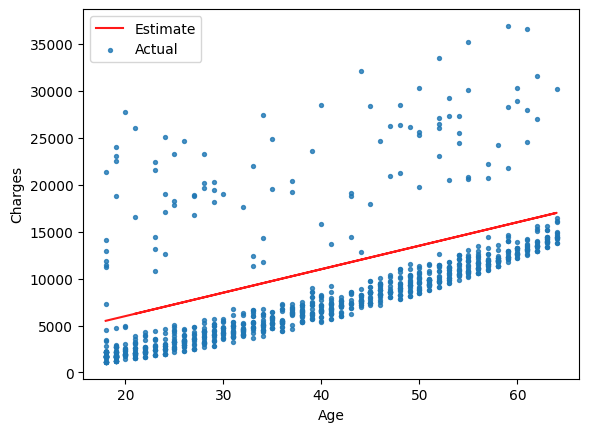

Parameters: w=250, b=1000


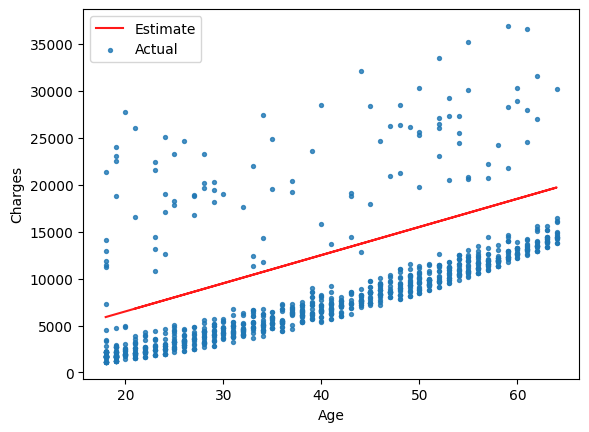

Parameters: w=300, b=500


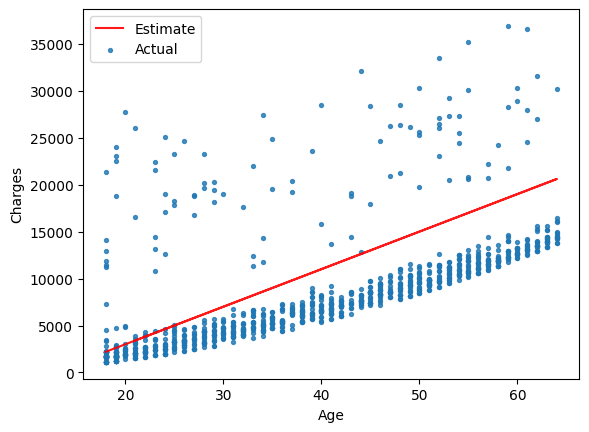

Parameters: w=400, b=-5000


In [32]:
import matplotlib.pyplot as plt

non_smoker_df = df[df.smoker == 'no']

def estimate_charges(age, w, b):
    return w * age + b

def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);
    plt.show()


# Try different parameter pairs
# Example 1
w1 = 250
b1 = 1000
try_parameters(non_smoker_df, w1, b1)
print(f"Parameters: w={w1}, b={b1}")
# Observations: The line seems to be below the majority of data points for younger individuals and slightly above for older individuals, suggesting it may be underestimating charges for a significant portion of the data.

# Example 2
w2 = 300
b2 = 500
try_parameters(non_smoker_df, w2, b2)
print(f"Parameters: w={w2}, b={b2}")
# Observations: The line seems to be a better fit than the previous one, but still, it might be underestimating the charges for older individuals and overestimating for the younger ones. It is probably needed to have more complex dependency between age and charges.

# Example 3
w3 = 400
b3 = -5000
try_parameters(non_smoker_df, w3, b3)
print(f"Parameters: w={w3}, b={b3}")
# Observations: This line appears to follow the trend of the data more closely, particularly for older individuals. It demonstrates how changing the slope and intercept can lead to improved alignment with the data's pattern.


**Observation when w=250, b=1000:**

The line seems to be below the majority of data points for younger individuals and slightly above for older individuals, suggesting it may be underestimating charges for a significant portion of the data.


**Observation when w=300, b=500:**

The line seems to be a better fit than the previous one, but still, it might be underestimating the charges for older individuals and overestimating for the younger ones. It is probably needed to have more complex dependency between age and charges.

**Observation when w=400, b=-5000:**

This line appears to follow the trend of the data more closely, particularly for older individuals. It demonstrates how changing the slope and intercept can lead to improved alignment with the data's pattern.



**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [33]:
import numpy as np

def calculate_rmse(actual_values, predicted_values):

  rmse = np.sqrt(np.mean((np.array(actual_values) - np.array(predicted_values))**2))
  return rmse

# Calculate RMSE for the parameter pairs from Task 5
actual_charges = non_smoker_df.charges
ages = non_smoker_df.age

predicted_charges_1 = estimate_charges(ages, w1, b1)
rmse_1 = calculate_rmse(actual_charges, predicted_charges_1)
print(f"RMSE for w={w1}, b={b1}: {rmse_1}")

predicted_charges_2 = estimate_charges(ages, w2, b2)
rmse_2 = calculate_rmse(actual_charges, predicted_charges_2)
print(f"RMSE for w={w2}, b={b2}: {rmse_2}")

predicted_charges_3 = estimate_charges(ages, w3, b3)
rmse_3 = calculate_rmse(actual_charges, predicted_charges_3)
print(f"RMSE for w={w3}, b={b3}: {rmse_3}")

RMSE for w=250, b=1000: 5255.090881695294
RMSE for w=300, b=500: 6084.0986441911855
RMSE for w=400, b=-5000: 5532.88507495513


**Conclusion:**

The lowest RMSE value achieved among the three examples represents the best fit so far.


**Strategy for finding better values using trial and error:**
1. Start with initial values for w and b (e.g., w=0, b=0).
2. Calculate the RMSE for these values.
3. Try adjusting w slightly (up or down) and recalculate RMSE.
4. If RMSE decreases, continue adjusting w in the same direction.
5. If RMSE increases, try adjusting b instead (up or down) and recalculate RMSE.
6. Repeat steps 3-5, making smaller adjustments to w and b as you get closer to a good fit.
7. You can also try different starting values for w and b and see if you can improve the RMSE.
8. Continue this process until the RMSE stops decreasing significantly.

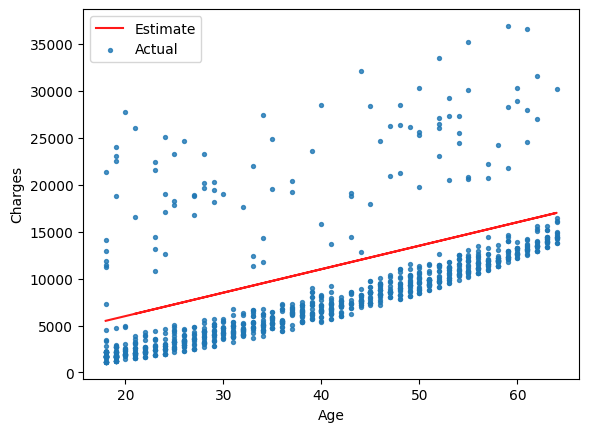

Parameters: w=250, b=1000, RMSE=5255.090881695294


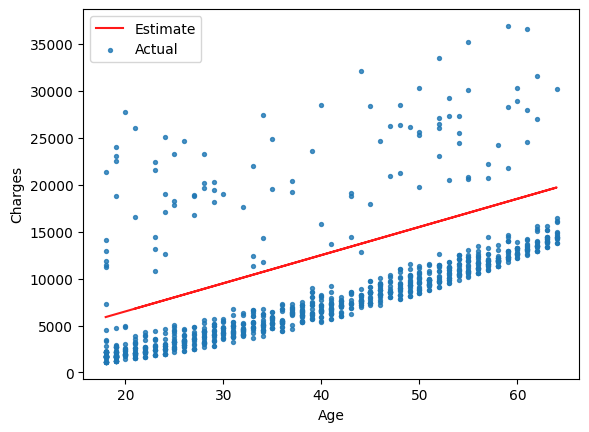

Parameters: w=300, b=500, RMSE=6084.09864419118


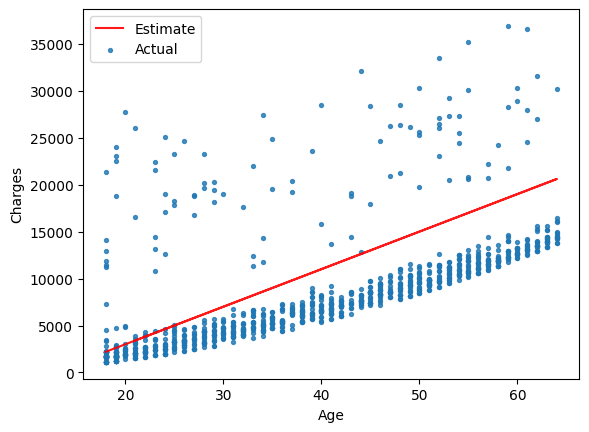

Parameters: w=400, b=-5000, RMSE=5532.885074955131


In [38]:
def try_parameters_with_rmse(df, w, b):
    ages = df.age
    target = df.charges
    estimated_charges = estimate_charges(ages, w, b)
    rmse = calculate_rmse(target, estimated_charges)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8, alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);
    plt.show()

    print(f"Parameters: w={w}, b={b}, RMSE={rmse}")

# Example 1
w1 = 250
b1 = 1000
try_parameters_with_rmse(non_smoker_df, w1, b1)


# Example 2
w2 = 300
b2 = 500
try_parameters_with_rmse(non_smoker_df, w2, b2)

# Example 3
w3 = 400
b3 = -5000
try_parameters_with_rmse(non_smoker_df, w3, b3)

import numpy as np

def calculate_rmse(y_true, y_pred):
    
    rmse = np.sqrt(np.mean((y_true - y_pred)**2))
    return rmse

In fact, gradient descent algorithm is a trial and error approach.

In [47]:
#Gradient Descent Algorithm

def gradient_descent(df, learning_rate=0.0001, epochs=1000):
    w = 0.1
    b = 0.1
    n = len(df)
    ages = df.age.values
    target = df.charges.values

    for _ in range(epochs):
        estimated_charges = estimate_charges(ages, w, b)
        error = target - estimated_charges
        dw = -(2 / n) * np.sum(ages * error)
        db = -(2 / n) * np.sum(error)
        w -= learning_rate * dw
        b -= learning_rate * db
        
        # Early stopping condition to prevent divergence
        if np.isnan(w) or np.isinf(w) or np.isnan(b) or np.isinf(b):
            print("Divergence detected. Stopping early.")
            break
    
    return w, b

def estimate_charges(age, w, b):
    return w * age + b

def calculate_rmse(df, w, b):
    estimated_charges = estimate_charges(df.age.values, w, b)
    rmse = np.sqrt(np.mean((df.charges.values - estimated_charges) ** 2))
    return rmse

w_gd, b_gd = gradient_descent(non_smoker_df)
rmse_gd = calculate_rmse(non_smoker_df, w_gd, b_gd)
print(f"Gradient descent parameters: w={w_gd}, b={b_gd}, RMSE={rmse_gd}")



Gradient descent parameters: w=221.10243388126872, b=-41.88575700129347, RMSE=4713.255287257482
